In [1]:
import gdal 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os 
import pandas as pd
import matplotlib.colors as col
from math import sin, cos, sqrt, atan2

In [2]:
def make_segmented_cmap(): 
    c1 = '#f5f4f2'
    c2 = '#b0b0b0'
    c3 = '#9c086f'
    c4 = '#de079c'
    c5 = '#b8d2de'
    c6 = '#6f9aad'
    c7 = '#02f5ed'
    c8 = '#66f5ff'
    c9 = '#adc3ff'
    c10 = '#a3a3f0'
    c11 = '#7e7ecf'
    c12 = '#4d4dc9'
    c13 = '#0000fc'
    c14 = '#6074b5'
    c15 = '#4a7052'
    c16 = '#2b8f3a'
    c17 = '#57b565'
    c18 = '#8ce070'
    c19 = '#c0f7ab'
    c20 = '#fbff00'
    c21 = '#ffbb00'
    c22 = '#edb92b'
    c23 = '#ad7924'
    c24 = '#e07575'
    c25 = '#ff0000'
    c26 = '#ad0000'
    c27 = '#7d0000'
    anglemap = col.LinearSegmentedColormap.from_list('anglemap', [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27], N=256, gamma=1)
    return anglemap

segmented_cmap = make_segmented_cmap()


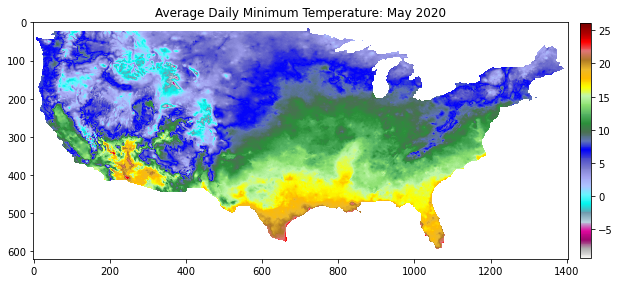

In [3]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\Machine Learning\\May_2020_mintemp')
prism_ds = gdal.Open("PRISM_tmin_stable_4kmM3_202005_bil.bil")
prism_nodata = -9999 # get this from hdr file
prism_band = prism_ds.GetRasterBand(1)
prism_array = prism_band.ReadAsArray().astype(np.float32)
# prism_nodata = prism_band.GetNoDataValue()
prism_array[prism_array == prism_nodata] = np.nan
prism_ds = None

im = plt.figure(figsize=(10,15))
plt.imshow(prism_array, cmap=segmented_cmap)
plt.colorbar(fraction=0.021, pad=0.02)
plt.title('Average Daily Minimum Temperature: May 2020')
plt.show()



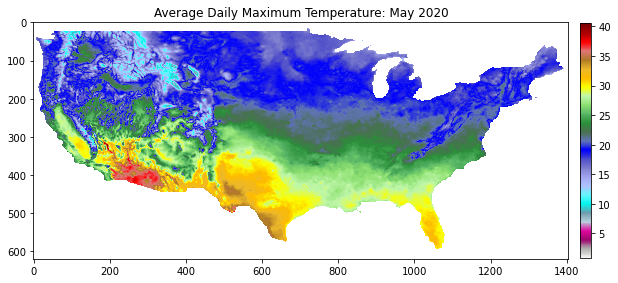

In [4]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\Machine Learning\\May_2020_maxtemp')
prism_mm = gdal.Open("PRISM_tmax_stable_4kmM3_202005_bil.bil")
prism_nodatamm = -9999 # get this from hdr file
prism_bandmm = prism_mm.GetRasterBand(1)
prism_arraymm = prism_bandmm.ReadAsArray().astype(np.float32)
# prism_nodata = prism_band.GetNoDataValue()
prism_arraymm[prism_arraymm == prism_nodatamm] = np.nan
prism_dsmm = None

im = plt.figure(figsize=(10,15))
plt.imshow(prism_arraymm, cmap=segmented_cmap)
plt.colorbar(fraction=0.021, pad=0.02)
plt.title('Average Daily Maximum Temperature: May 2020')
plt.show()

In [5]:
# Read in PRISM header data
with open('PRISM_tmax_stable_4kmM3_202005_bil.hdr', 'r') as prism_f:
    prism_header = prism_f.readlines()[:]

prism_header

['BYTEORDER      I\n',
 'LAYOUT         BIL\n',
 'NROWS          621\n',
 'NCOLS          1405\n',
 'NBANDS         1\n',
 'NBITS          32\n',
 'BANDROWBYTES   5620\n',
 'TOTALROWBYTES  5620\n',
 'PIXELTYPE      FLOAT\n',
 'ULXMAP         -125\n',
 'ULYMAP         49.9166666666664\n',
 'XDIM           0.0416666666667\n',
 'YDIM           0.0416666666667\n',
 'NODATA         -9999\n']

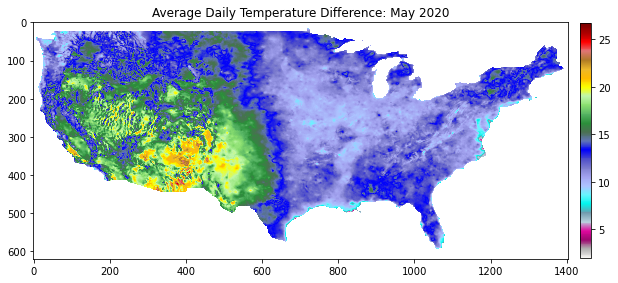

In [6]:
### Find the diference between maximum and minimum average daily temperature
prism_dif =  prism_arraymm - prism_array
im = plt.figure(figsize=(10,15))
plt.imshow(prism_dif, cmap=segmented_cmap)
plt.colorbar(fraction=0.021, pad=0.02)
plt.title('Average Daily Temperature Difference: May 2020')
plt.show()

In [7]:
# Read the PRISM ASCII raster header
hdr_header = [item.strip().split()[0] for item in prism_header]
hdr_content = [item.strip().split()[-1] for item in prism_header]
df_hdr = pd.DataFrame(hdr_content,hdr_header)
df_hdr = df_hdr[0]

prism_nodata = float(df_hdr['NODATA'])
prism_rows = int(df_hdr['NROWS'])
prism_cols = int(df_hdr['NCOLS'])
prism_cs = float(df_hdr['XDIM'])

prism_extent = [
    float(df_hdr['ULXMAP']) - 0.5 * prism_cs,
    float(df_hdr['ULXMAP']) - 0.5 * prism_cs + prism_cols * prism_cs,
    float(df_hdr['ULYMAP']) + 0.5 * prism_cs - prism_rows * prism_cs,
    float(df_hdr['ULYMAP']) + 0.5 * prism_cs
]



In [8]:
prism_extent

[-125.02083333333336,
 -66.47916666661986,
 24.062499999979053,
 49.93749999999975]

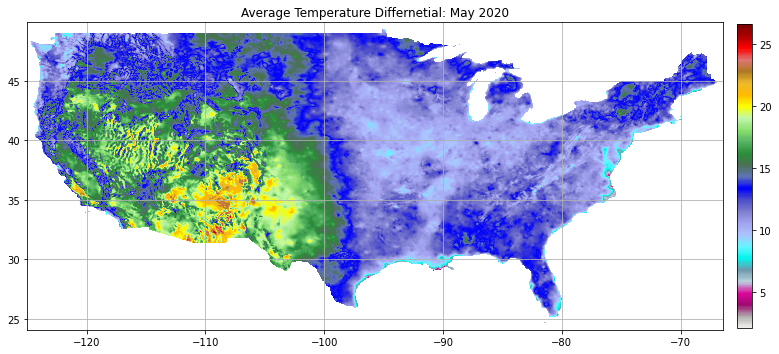

In [9]:
plt.figure(figsize=(13,30))
img = plt.imshow(prism_dif,cmap=segmented_cmap, extent=prism_extent)
plt.colorbar(fraction=0.021, pad=0.02)
plt.grid()
plt.title('Average Temperature Differnetial: May 2020')
plt.show()

In [10]:
os.getcwd()
os.chdir("C:\\Users\\arowan\OneDrive - New Mexico State University\\Research\\Machine Learning\\US States")

In [11]:
# read NBI database as pd dataframe (bridge location)
seg_filename = 'NBINM.txt'
h = pd.read_csv(seg_filename,sep=',', skipinitialspace=True, engine='python').drop([0])
X,Y = h['LAT_016'],h['LONG_017'] # go to https://www.fhwa.dot.gov/bridge/mtguide.pdf to find guide on coordinate data

# convert each lat and long to str in order to slice the integers
x_str = [str(i) for i in X]
y_str = [str(i) for i in Y]

In [12]:
rating = np.array(h['BRIDGE_CONDITION'])
rating = np.delete(rating,3920) # remove the brige that corresponds to (0,0) lat and long. This was an error on the database

In [13]:
def convertlat_dd(pt):
    # for lat, coordinates are in format xxxxxxxx -> xx xx xx.xx
    # pt must be a string in order to slice 
    deg = pt[0:2]
    minn = pt[2:4]
    sec = pt[4:6]
    
    deg = int(deg)
    minn = float(minn)
    sec = int(sec)
    
    
    dd = deg + (minn/60) + (sec/3600)
    return dd

def convertlong_dd(pt):
    # for lat, coordinates are in format xxxxxxxxx -> xxx xx xx.xx
    # pt must be a string in order to slice 
    deg = int(pt[0:3])
    minn = int(pt[3:5])
    sec = int(pt[5:7])
    
    
    dd = -(deg + (minn/60) + (sec/3600))
    return dd


In [14]:
# For some reasong, there were '0' values in the lat and long coordinates. These were removed, were probably origin location ###
x_str.remove('0')
y_str.remove('0')

# create dd (decimal) coordinate points for bridge locations
x = np.array([convertlat_dd(i) for i in x_str]) # x coordinate of bridge
y = np.array([convertlong_dd(i) for i in y_str])  # y coordinate of bridge

# reshape arrays for coordinates and ratings
rating = np.reshape(rating,(rating.size,1))
x = np.reshape(x,(x.size,1))
y = np.reshape(y,(y.size,1))


In [15]:
supr = h['SUPERSTRUCTURE_COND_059']
sub = h['SUBSTRUCTURE_COND_060']
### remove origin location ###
del sub[3920]
del supr[3920]

In [16]:
### remove ratings where an 'N' was present in supr abd sub rating ###
rating = rating[supr != 'N']

### remove x and y coordinates where "N" is present in rating ###
x = x[supr != 'N']
y = y[supr != 'N']

In [17]:
### remove "N" rating from superstructure and substructure ratings ###
supr = np.array(supr[supr != 'N'])
sub = np.array(sub[sub != 'N'])

### convert elements to integers ###
supr = np.array([int(i) for i in supr])
sub = np.array([int(i) for i in sub])

In [18]:
### the rating system was as below
#     G = Good (class 1)
#     F = Fair (class 2)
#     P = Poor (class 3)

# Convert ratings to class 1,2 and 3 accordingly >>>> this should be one-hot encoded at some point
rating[rating == 'G'] = 0
rating[rating == 'F'] = 1
rating[rating == 'P'] = 2

In [19]:
######### ADD STATE OUTLINES #######
import os
from collections import defaultdict
from descartes import PolygonPatch
import fiona
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from shapely.geometry import MultiPolygon, Polygon, shape
import pandas as pd
import shapefile as s

In [20]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

shp_path = 'tl_2019_us_state.shp'
shape = s.Reader("tl_2019_us_state.shp")
df = read_shapefile(shape)


In [21]:
df['coords'][0]

[(-81.747254, 39.095379),
 (-81.746354, 39.096578),
 (-81.746254, 39.096878),
 (-81.746054, 39.096978),
 (-81.745854, 39.097277999999996),
 (-81.74575399999999, 39.097477999999995),
 (-81.745554, 39.097978),
 (-81.745454, 39.098078),
 (-81.74535399999999, 39.098478),
 (-81.745254, 39.098878),
 (-81.745154, 39.099378),
 (-81.74495399999999, 39.099778),
 (-81.744754, 39.100178),
 (-81.744554, 39.100578),
 (-81.744354, 39.101078),
 (-81.74405399999999, 39.101777999999996),
 (-81.743854, 39.102378),
 (-81.743653, 39.103078),
 (-81.74355299999999, 39.103677999999995),
 (-81.743453, 39.104278),
 (-81.743453, 39.104878),
 (-81.743453, 39.105378),
 (-81.743253, 39.106078),
 (-81.742953, 39.106578),
 (-81.742953, 39.107276999999996),
 (-81.742953, 39.107977),
 (-81.743053, 39.108677),
 (-81.742953, 39.109277),
 (-81.742898, 39.109660999999996),
 (-81.742853, 39.109977),
 (-81.742553, 39.110676999999995),
 (-81.742353, 39.111277),
 (-81.742353, 39.111877),
 (-81.742453, 39.112477),
 (-81.742453,

<ipython-input-22-0eb37c7cf228>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


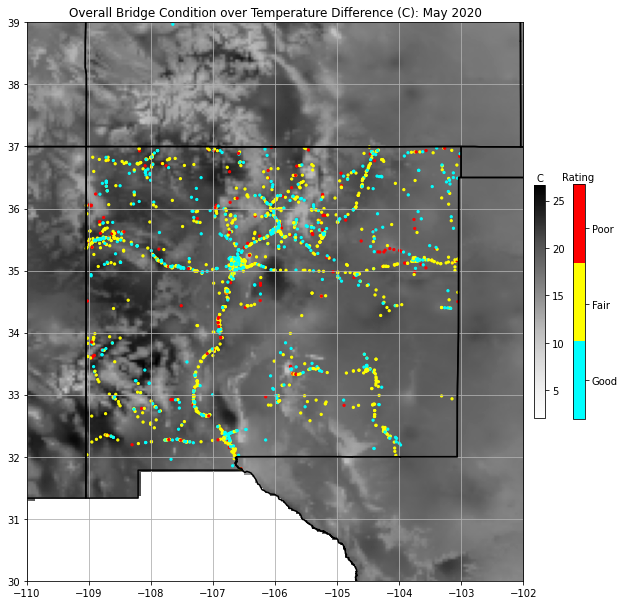

In [22]:
colors = ['aqua','yellow','red']
fig = plt.figure(figsize=(10,12))


plt.scatter(y,x,c=rating,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.33,3,.65)
cb.set_ticks(loc)
cb.set_ticklabels(['Good','Fair','Poor'])
cb.set_label('Rating', labelpad=-40, y=1.05, rotation=0)

for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_dif,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Overall Bridge Condition over Temperature Difference (C): May 2020')
plt.show()

<ipython-input-23-54719d16e24a>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


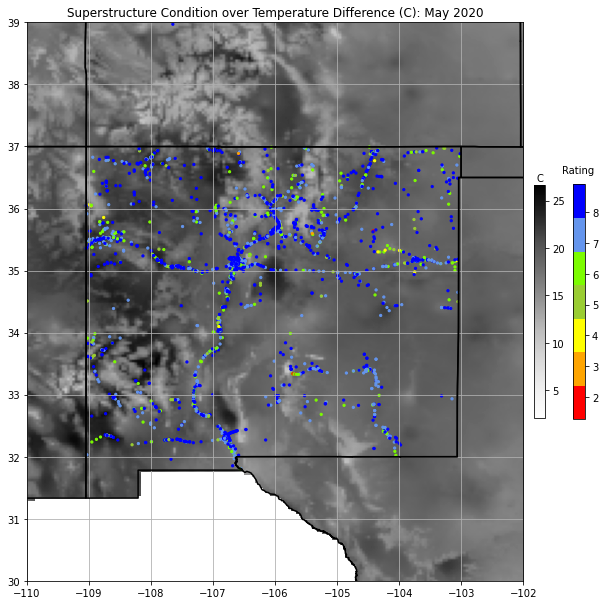

In [23]:
colors = ['red','orange','yellow','yellowgreen','lawngreen','cornflowerblue','blue']
plt.figure(figsize=(10,12))

plt.scatter(y,x,c=supr,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.75,8,1.05)
cb.set_ticks(loc)
cb.set_ticklabels(['2','3','4','5','6','7','8'])
cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)


for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_dif,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Superstructure Condition over Temperature Difference (C): May 2020')
plt.show()

<ipython-input-24-e06fe66dbb6b>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


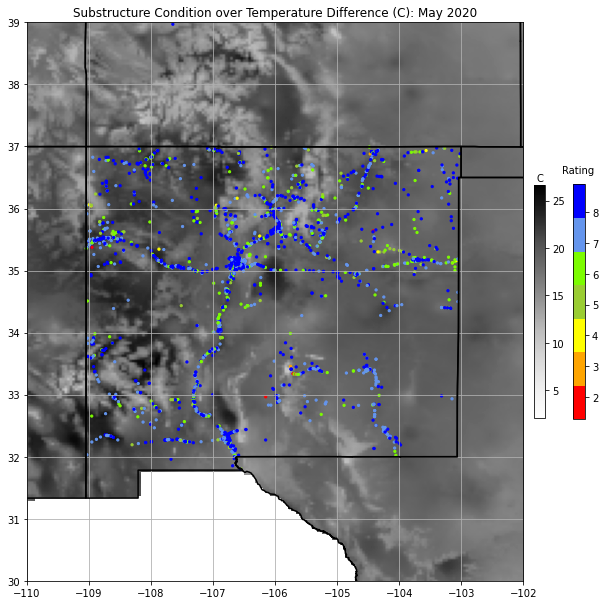

In [24]:
colors = ['red','orange','yellow','yellowgreen','lawngreen','cornflowerblue','blue']
plt.figure(figsize=(10,12))

plt.scatter(y,x,c=sub,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.75,8,1.05)
cb.set_ticks(loc)
cb.set_ticklabels(['2','3','4','5','6','7','8'])
cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)


for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_dif,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Substructure Condition over Temperature Difference (C): May 2020')
plt.show()

<ipython-input-25-ac598845379c>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


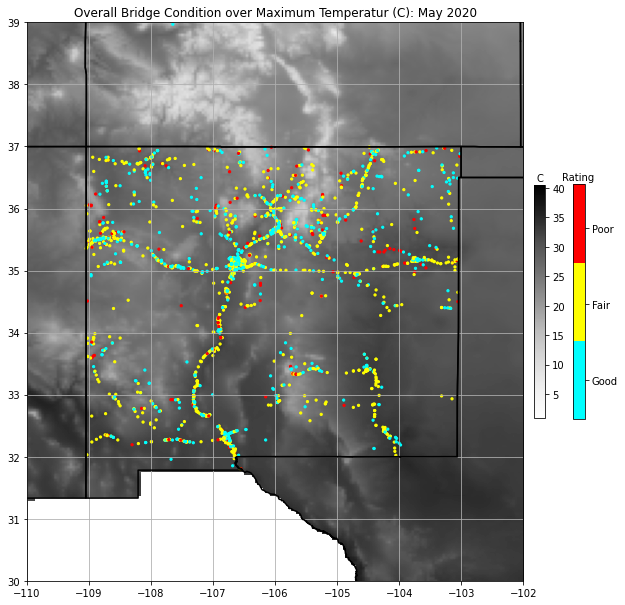

In [25]:
colors = ['aqua','yellow','red']
fig = plt.figure(figsize=(10,12))


plt.scatter(y,x,c=rating,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.33,3,.65)
cb.set_ticks(loc)
cb.set_ticklabels(['Good','Fair','Poor'])
cb.set_label('Rating', labelpad=-40, y=1.05, rotation=0)

for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_arraymm,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Overall Bridge Condition over Maximum Temperatur (C): May 2020')
plt.show()


<ipython-input-26-868c4122a10c>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


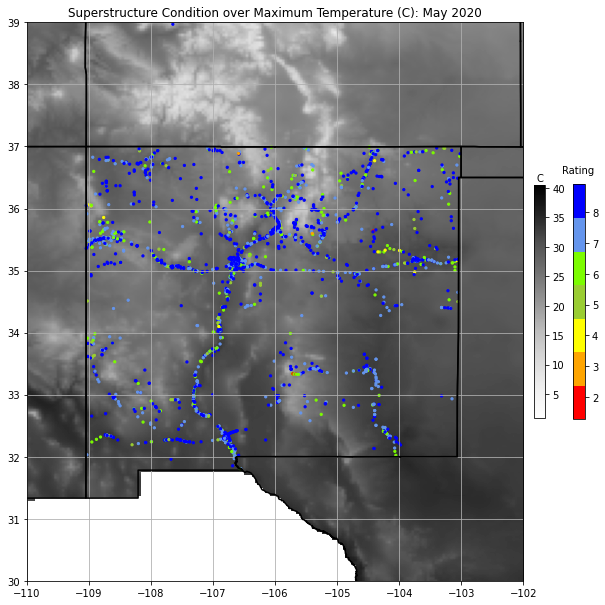

In [26]:
colors = ['red','orange','yellow','yellowgreen','lawngreen','cornflowerblue','blue']
plt.figure(figsize=(10,12))

plt.scatter(y,x,c=supr,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.75,8,1.05)
cb.set_ticks(loc)
cb.set_ticklabels(['2','3','4','5','6','7','8'])
cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)


for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_arraymm,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Superstructure Condition over Maximum Temperature (C): May 2020')
plt.show()

<ipython-input-27-8f24de53611e>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


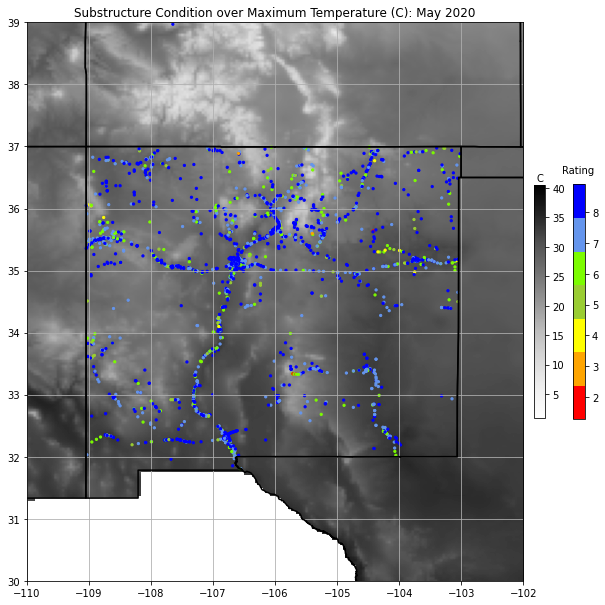

In [27]:
colors = ['red','orange','yellow','yellowgreen','lawngreen','cornflowerblue','blue']
plt.figure(figsize=(10,12))

plt.scatter(y,x,c=supr,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.75,8,1.05)
cb.set_ticks(loc)
cb.set_ticklabels(['2','3','4','5','6','7','8'])
cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)


for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_arraymm,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Substructure Condition over Maximum Temperature (C): May 2020')
plt.show()

In [28]:
deck = h['DECK_COND_058']
del deck[3920]
deck_rating = np.array(deck[deck != 'N'])



In [29]:
deck_rating= np.array([int(i) for i in deck_rating])

<ipython-input-30-96b4713a3990>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


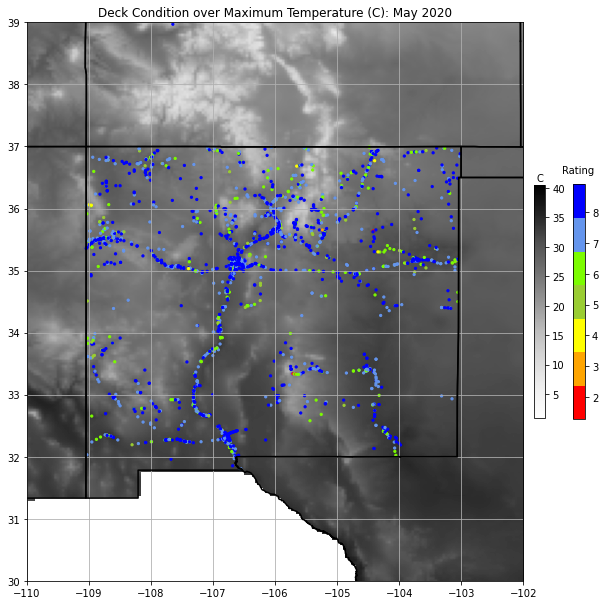

In [30]:
colors = ['red','orange','yellow','yellowgreen','lawngreen','cornflowerblue','blue']
plt.figure(figsize=(10,12))

plt.scatter(y,x,c=deck_rating,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.75,8,1.05)
cb.set_ticks(loc)
cb.set_ticklabels(['2','3','4','5','6','7','8'])
cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)


for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_arraymm,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Deck Condition over Maximum Temperature (C): May 2020')
plt.show()

<ipython-input-31-d5ab6ad5ec7f>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


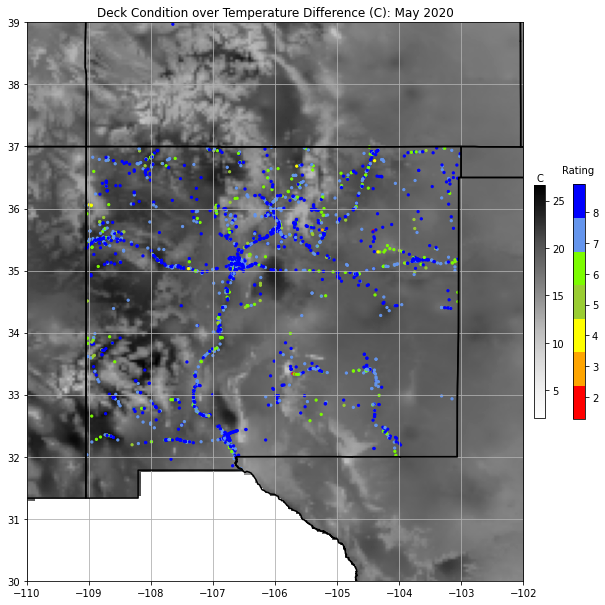

In [31]:
colors = ['red','orange','yellow','yellowgreen','lawngreen','cornflowerblue','blue']
plt.figure(figsize=(10,12))

plt.scatter(y,x,c=deck_rating,cmap=matplotlib.colors.ListedColormap(colors),s=5)
cb = plt.colorbar(fraction=0.021)
loc = np.arange(.75,8,1.05)
cb.set_ticks(loc)
cb.set_ticklabels(['2','3','4','5','6','7','8'])
cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)


for i in range(0,56):
    # plot state outlines
    pts = df['coords'][i]

    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')

plt.imshow(prism_dif,cmap='Greys', extent=prism_extent) # show prism data
axes = plt.axes()
axes.set_ylim([30, 39])
axes.set_xlim([-110, -102])
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)
plt.grid()
plt.title('Deck Condition over Temperature Difference (C): May 2020')
plt.show()

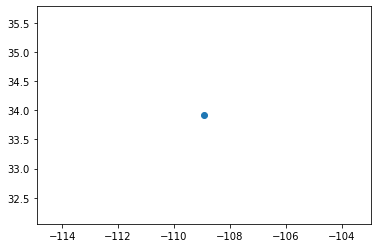

In [32]:
tst_bridge = [y[25],x[25]]
plt.scatter(tst_bridge[0],tst_bridge[1])
plt.show()

In [33]:
y[25]

array([-108.92638889])

In [34]:
prism_extent

[-125.02083333333336,
 -66.47916666661986,
 24.062499999979053,
 49.93749999999975]

In [35]:
def convert_x_coord(x):
    array_shape = prism_array.shape
    x_new = ((x - prism_extent[0])*(array_shape[1])/(prism_extent[1] - prism_extent[0])) 

    return x_new

def convert_y_coord(y):
    array_shape = prism_array.shape
    y_new = ((y - prism_extent[2])*(array_shape[0])/(prism_extent[3] - prism_extent[2])) 
    y_new = array_shape[0] - y_new
    
    return y_new

In [36]:
xt = convert_x_coord(tst_bridge[0])
yt = convert_y_coord(tst_bridge[1])

yt

array([384.44666667])

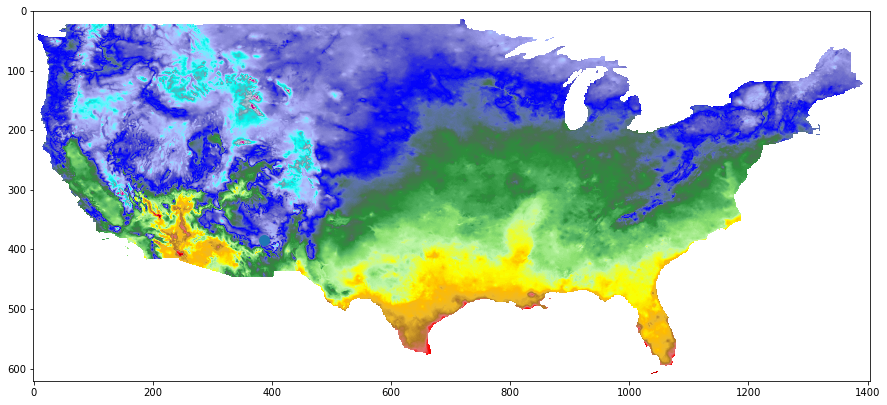

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(prism_array, cmap=segmented_cmap)
plt.scatter(xt,yt,s=100)
plt.show()

In [38]:
conv_y_coord = []
for c in y:
    conv_y_coord.append(convert_x_coord(c))

conv_x_coord = []
for c in x:
    conv_x_coord.append(convert_y_coord(c))

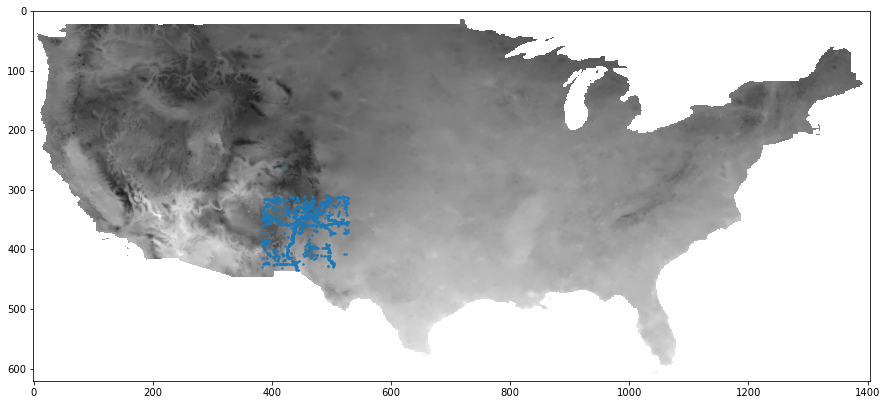

In [39]:
plt.figure(figsize=(15,15))
plt.imshow(prism_array,cmap='gray')
plt.scatter(conv_y_coord,conv_x_coord,s=2)
plt.show()

In [40]:
%%time
def calc_mean_temp(lat,lon,r):
    # bridge location
    cen_x = lat
    cen_y = lon

    # Image parameters
    a = prism_array.shape[0]
    b = prism_array.shape[1]

    # Find radial distances
    [X, Y] = np.meshgrid(np.arange(b) - cen_x, np.arange(a) - cen_y)
    R = np.sqrt(np.square(X) + np.square(Y))
    
    rad = np.arange(1, np.max(R), 1)
    intensity = np.zeros(len(rad))   
    bin_size = 0
    
    r = rad[r]
    mask = (np.less(R, r + bin_size))
    mean = np.mean(prism_dif[mask])
    
    return mean,mask
    
lat = conv_y_coord[25]
lon = conv_x_coord[25]
    
mask = calc_mean_temp(lat,lon,15)[1]
mean = calc_mean_temp(lat,lon,2)[0]
mean

Wall time: 34.9 ms


19.745274

<ipython-input-41-8fe056bc7b63>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


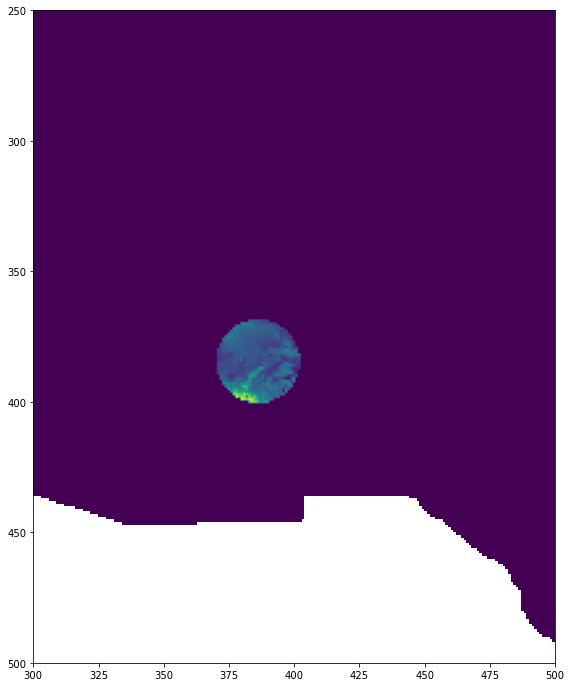

In [41]:
plt.figure(figsize=(12,12))
plt.imshow(mask*prism_array)
axes = plt.axes()
axes.set_ylim([500, 250])
axes.set_xlim([300, 500])
plt.show()


In [42]:
%%time
mt = []
for i in range(0,len(y)):
    mt.append(calc_mean_temp(conv_y_coord[i],conv_x_coord[i],1)[0])


Wall time: 33.7 s


<ipython-input-46-5c06bfdf3710>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


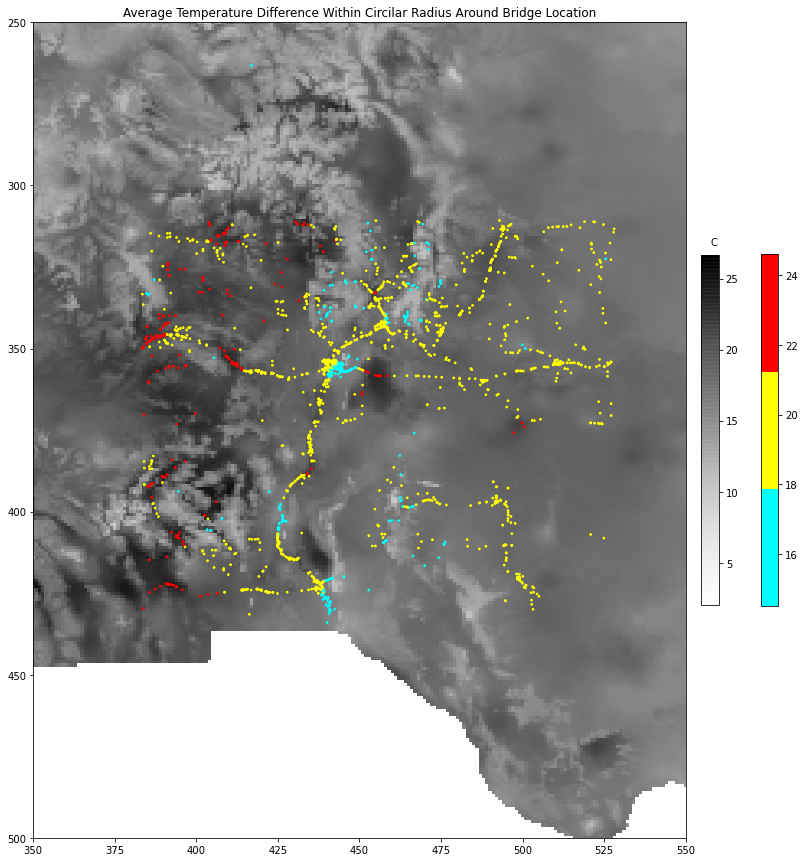

In [46]:
colors = ['aqua','yellow','red']
plt.figure(figsize=(15,15))


plt.scatter(conv_y_coord,conv_x_coord,c=mt,cmap=matplotlib.colors.ListedColormap(colors),s=3)
loc = np.arange(0,8,1)
cb.set_ticks(loc)
# cb.set_ticklabels(['2','3','4','5','6','7','8'])
# cb.set_label('Rating', labelpad=-20, y=1.08, rotation=0)
cb = plt.colorbar(fraction=0.021)

plt.imshow(prism_dif,cmap='Greys',alpha=.95)
cbb = plt.colorbar(fraction=0.0225, pad=0.02)
cbb.set_label('C', labelpad=-25, y=1.05, rotation=0)

axes = plt.axes()
axes.set_ylim([500, 250])
axes.set_xlim([350, 550])
plt.title('Average Temperature Difference Within Circilar Radius Around Bridge Location')
plt.show()

In [44]:
import numpy as np 
import pandas as pd
np.random.seed(2015)
data = []
for i in range(5):
    data.append(dict(zip(np.random.choice(10, replace=False, size=5),
                         np.random.randint(10, size=5))))
df = pd.DataFrame(data)
print(df)

     4    7    3    8    0    6    9    2    1    5
0  5.0  7.0  8.0  0.0  6.0  NaN  NaN  NaN  NaN  NaN
1  2.0  NaN  NaN  NaN  NaN  1.0  2.0  6.0  9.0  NaN
2  2.0  NaN  1.0  NaN  NaN  1.0  NaN  2.0  2.0  NaN
3  4.0  NaN  NaN  NaN  6.0  0.0  NaN  6.0  NaN  4.0
4  NaN  9.0  9.0  NaN  NaN  1.0  NaN  NaN  9.0  7.0


In [45]:
data

[{4: 5, 7: 7, 3: 8, 8: 0, 0: 6},
 {6: 1, 9: 2, 2: 6, 4: 2, 1: 9},
 {3: 1, 2: 2, 1: 2, 6: 1, 4: 2},
 {0: 6, 5: 4, 4: 4, 6: 0, 2: 6},
 {6: 1, 5: 7, 7: 9, 1: 9, 3: 9}]